# Make a clean mask for W51-E

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from astropy import units as u

In [3]:
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)

In [4]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show

In [5]:
import os
os.chdir("/lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/imaging_results")

In [6]:
imgs_before_b6, cubes_before_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0')

In [41]:
np.unravel_index(imgs_before_b6['includemask'].include().argmax(), imgs_before_b6['includemask'].shape)
blcx,blcy = imgs_before_b6['includemask'].include().max(axis=1).argmax(),imgs_before_b6['includemask'].include().max(axis=2).argmax()
blcx,blcy

(787, 723)

/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


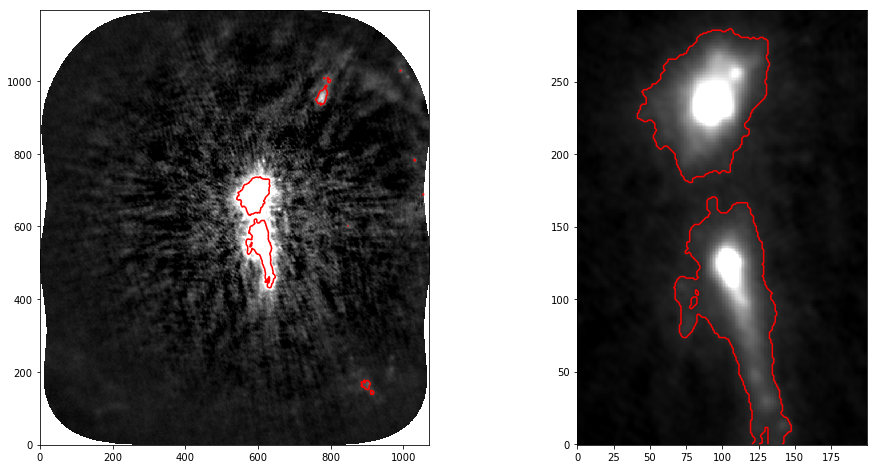

In [35]:
fig, (ax1,ax2) = pl.subplots(1,2)
mask_inner = imgs_before_b6['image'].value > 0.015
mask_outer = imgs_before_b6['image'].value > 0.004
mask_outer[0:200, 700:] = imgs_before_b6['image'].value[0:200, 700:] > 0.002
mask = mask_outer.copy()
mask[350:850, 400:800] = mask_inner[350:850, 400:800]
view = slice(450,750),slice(500,700)
ax1.imshow(imgs_before_b6['image'].value, origin='lower', vmin=-0.001, vmax=0.01, cmap='gray')
ax1.contour(mask, levels=[0.5], colors=['r'])
ax2.imshow(imgs_before_b6['image'].value[view], origin='lower', vmin=-0.001, vmax=0.1, cmap='gray')
ax2.contour(mask[view], levels=[0.5], colors=['r'])

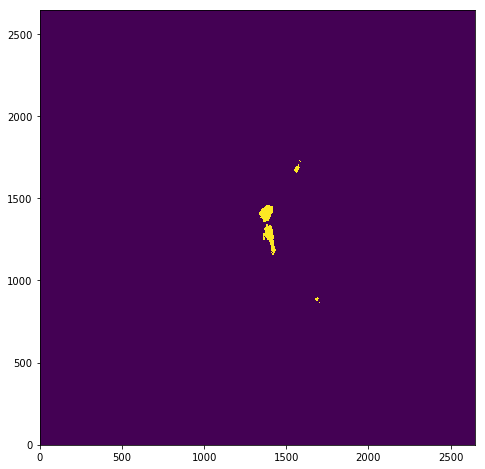

In [44]:
fullmask = imgs_before_b6['includemask'].include().squeeze()
fullmask[blcy:blcy+mask.shape[0], blcx:blcx+mask.shape[1]] = mask
pl.imshow(fullmask, origin='lower')

In [46]:
import casatools
ia = casatools.image()

In [55]:
ia.open('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0.image.tt0')
print(ia.shape(), fullmask[:,:,None,None].shape)
assert np.all(ia.shape() == fullmask[:,:,None,None].shape)
cs = ia.coordsys()
ia.close()

assert ia.fromarray(outfile='W51-E_B6_clean_mask.mask', pixels=fullmask.astype('float')[:,:,None,None], csys=cs.torecord(), overwrite=True)

[2646 2646    1    1] (2646, 2646, 1, 1)


In [91]:
ia.open('W51-E_B6_clean_mask.mask/')
img = ia.getchunk()
ia.close()

True

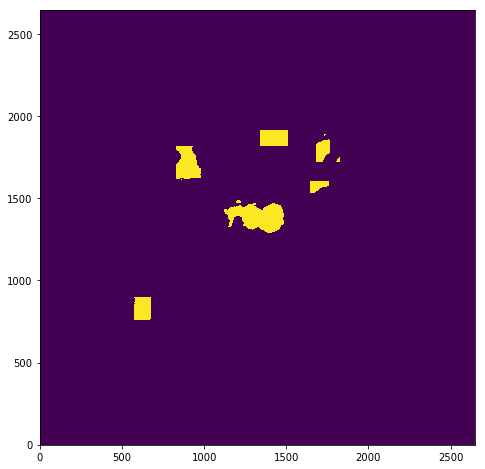

In [92]:
pl.imshow(img.squeeze(), origin='lower')

In [73]:
ls -lhrtd *robust0*mask

drwxr-xr-x 3 aginsbur aginsbur_imf 25K Aug 13  2018 W51-E_B6_uid___A001_X1296_X215_continuum_merged_robust0.mask/
drwxr-xr-x 3 aginsbur aginsbur_imf 25K Sep 15 06:15 G337.92_B6_uid___A001_X1296_X13f_continuum_merged_12M_robust0.mask/
drwxr-xr-x 3 aginsbur aginsbur_imf 25K Sep 16 16:54 W51-IRS2_B6_uid___A001_X1296_X189_continuum_merged_12M_robust0.mask/
drwxr-xr-x 3 aginsbur aginsbur_imf 25K Sep 17 06:42 G337.92_B3_uid___A001_X1296_X147_continuum_merged_12M_robust0.mask/
drwxr-xr-x 3 aginsbur aginsbur_imf 25K Sep 18 08:16 W51-IRS2_B3_uid___A001_X1296_X191_continuum_merged_12M_robust0.mask/
drwxr-xr-x 3 aginsbur aginsbur_imf 25K Sep 18 21:01 W43-MM1_B3_uid___A001_X1296_X1b1_continuum_merged_12M_robust0.mask/
drwxr-xr-x 3 aginsbur aginsbur_imf 25K Dec 14 21:45 uid___A002_Xc75eba_X4f72_W51-E_B3_spw1_12M_robust0.mask/
drwxr-xr-x 3 aginsbur aginsbur_imf 25K Dec 22 09:34 uid___A002_Xc75eba_X4f72_W51-E_B3_spw1_7M12M_robust0.mask/
drwxr-xr-x 3 aginsbur observer     25K Mar  4 17:53 uid___A002_X

In [74]:
ia.open('W51-E_B6_clean_mask.mask/')
img1 = ia.getchunk()
cs1 = ia.coordmeasures()
ia.close()

ia.open('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0.mask')
img2 = ia.getchunk()
cs2 = ia.coordmeasures()
ia.close()

True

In [78]:
for key in cs1['measure']['direction']:
    print(key, cs1['measure']['direction'][key], cs2['measure']['direction'][key])

m0 {'unit': 'rad', 'value': -1.205427646747178} {'unit': 'rad', 'value': -1.205427646747178}
m1 {'unit': 'rad', 'value': 0.25321606540648156} {'unit': 'rad', 'value': 0.25321606540648156}
refer ICRS ICRS
type direction direction


In [79]:
ia.open('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0.mask')

True

In [81]:
import make_custom_mask

In [82]:
ls -lhrtd *dirty*

drwxr-xr-x 3 aginsbur observer 25K Feb 27 20:15 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_dirty.psf.tt0/
drwxr-xr-x 3 aginsbur observer 25K Feb 27 20:15 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_dirty.weight.tt2/
drwxr-xr-x 3 aginsbur observer 25K Feb 27 20:15 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_dirty.weight.tt1/
drwxr-xr-x 3 aginsbur observer 25K Feb 27 20:15 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_dirty.weight.tt0/
drwxr-xr-x 3 aginsbur observer 25K Feb 27 20:15 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_dirty.sumwt.tt2/
drwxr-xr-x 3 aginsbur observer 25K Feb 27 20:15 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_dirty.sumwt.tt1/
drwxr-xr-x 3 aginsbur observer 25K Feb 27 20:15 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_dirty.sumwt.tt0/
drwxr-xr-x 3 aginsbur observer 25K Feb 27 20:15 W51-E_B6_uid_

In [83]:
ia.open('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0.image.tt0')

True

In [90]:
make_custom_mask.make_custom_mask('W51-E', 'W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_dirty.image.tt0', '/lustre/naasc/users/aginsbur/repos/reduction/reduction/', 'B6')

'W51-E_B6_clean_mask.mask'

In [93]:
ls -lhrtd W51-E_B6*robust0*image.tt0

drwxr-xr-x 4 aginsbur aginsbur_imf 25K Aug 14  2018 W51-E_B6_uid___A001_X1296_X215_continuum_merged_robust0.image.tt0/
drwxr-xr-x 3 aginsbur observer     25K Mar  7 16:29 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust0.image.tt0/
drwxr-xr-x 3 aginsbur observer     25K Mar  9 01:21 W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0.image.tt0/


In [94]:
make_custom_mask.make_custom_mask('W51-E', 'W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0.image.tt0', '/lustre/naasc/users/aginsbur/repos/reduction/reduction/', 'B6')

'W51-E_B6_clean_mask.mask'